# Import Libaries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Clone Dataset

In [2]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 39.00 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
import os
base_dir = '/content/datasets/Data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_covid_dir = os.path.join(train_dir, 'COVID19')
train_normal_dir = os.path.join(train_dir, 'NORMAL')

test_covid_dir = os.path.join(test_dir, 'COVID19')
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [4]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(279).jpg', 'COVID19(390).jpg', 'COVID19(267).jpg', 'COVID-19 (3).jpeg', 'COVID19(208).jpg', 'COVID19(41).jpg', 'COVID-19 (7).jpeg', 'COVID-19 (43).jpg', 'COVID19(296).jpg', 'COVID19(298).jpg']
['NORMAL(751).jpg', 'NORMAL(1148).jpg', 'NORMAL(7).jpg', 'NORMAL(429).jpg', 'NORMAL(680).jpg', 'NORMAL(24).jpg', 'NORMAL(1255).jpg', 'NORMAL(579).jpg', 'NORMAL(135).jpg', 'NORMAL(487).jpg']
['COVID19(427).jpg', 'COVID19(444).jpg', 'COVID-19 (718).jpg', 'COVID19(287).jpg', 'COVID-19 (587).jpg', 'COVID19(200).jpg', 'COVID19(85).jpg', 'COVID19(573).jpg', 'COVID19(552).jpg', 'COVID-19 (457).jpg']
['NORMAL(1204).jpg', 'NORMAL(796).jpg', 'NORMAL(181).jpg', 'NORMAL(1384).jpg', 'NORMAL(1118).jpg', 'NORMAL(232).jpg', 'NORMAL(687).jpg', 'NORMAL(1441).jpg', 'NORMAL(156).jpg', 'NORMAL(324).jpg']


In [5]:
print("train dataset covid images: ", len(train_covid_names))
print("train dataset normal images: ", len(train_normal_names))
print("test dataset covid images: ", len(test_covid_names))
print("test dataset normal images: ", len(test_normal_names))

print("total train images: ", len(train_covid_names+train_normal_names))
print("total test images: ", len(test_covid_names+test_normal_names))

train dataset covid images:  545
train dataset normal images:  1266
test dataset covid images:  167
test dataset normal images:  317
total train images:  1811
total test images:  484


# Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(279).jpg', '/content/datasets/Data/train/COVID19/COVID19(390).jpg', '/content/datasets/Data/train/COVID19/COVID19(267).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (3).jpeg', '/content/datasets/Data/train/COVID19/COVID19(208).jpg', '/content/datasets/Data/train/COVID19/COVID19(41).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (7).jpeg', '/content/datasets/Data/train/COVID19/COVID-19 (43).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(751).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1148).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(7).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(429).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(680).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(24).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1255).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(579).jpg']


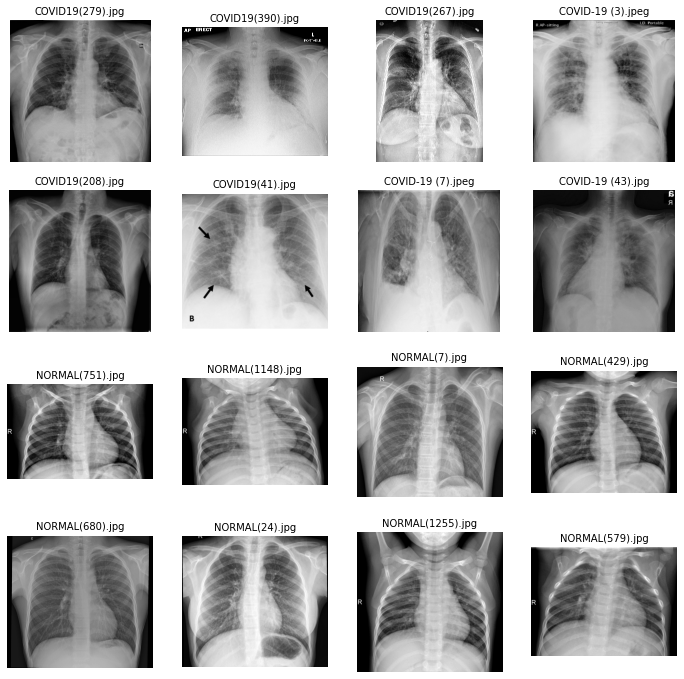

In [6]:
import matplotlib.image as mpimg

#set the number of colums and rows
nrows = 4
ncols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filesnames from the covid & normal dir of the train dataset
next_covid_pic = [os.path.join(train_covid_dir,fname)for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname)for fname in train_normal_names[0:8]]

# print the list
print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic+next_normal_pic):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize = 10)
  plt.imshow(img, cmap = 'gray')

plt.show()

# Generating Training, Validation & testing Batches

In [7]:
# Generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#Generator for our Validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

#Generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = train_datagen.flow_from_directory(test_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
train_generator.image_shape

(150, 150, 3)

Build CNN Model

In [10]:
model = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

# Compile & Train Model

In [11]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
# train the model
history = model.fit(train_generator,
                              epochs=30,
                              validation_data = validation_generator,
                              validation_steps = 10)

Epoch 1/30
46/46 [==============================] - 45s 968ms/step - loss: 0.8976 - accuracy: 0.7647 - val_loss: 0.3225 - val_accuracy: 0.9312
Epoch 2/30
46/46 [==============================] - 45s 973ms/step - loss: 0.2342 - accuracy: 0.9034 - val_loss: 0.1599 - val_accuracy: 0.9625
Epoch 3/30
46/46 [==============================] - 45s 972ms/step - loss: 0.1733 - accuracy: 0.9400 - val_loss: 0.1790 - val_accuracy: 0.9500
Epoch 4/30
46/46 [==============================] - 45s 973ms/step - loss: 0.1498 - accuracy: 0.9462 - val_loss: 0.1355 - val_accuracy: 0.9500
Epoch 5/30
46/46 [==============================] - 45s 971ms/step - loss: 0.1760 - accuracy: 0.9420 - val_loss: 0.1472 - val_accuracy: 0.9500
Epoch 6/30
46/46 [==============================] - 45s 989ms/step - loss: 0.1548 - accuracy: 0.9538 - val_loss: 0.2492 - val_accuracy: 0.9312
Epoch 7/30
46/46 [==============================] - 46s 989ms/step - loss: 0.1316 - accuracy: 0.9531 - val_loss: 0.1402 - val_accuracy: 0.9594

In [14]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

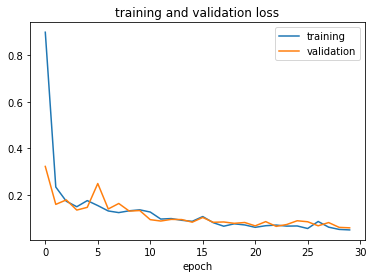

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

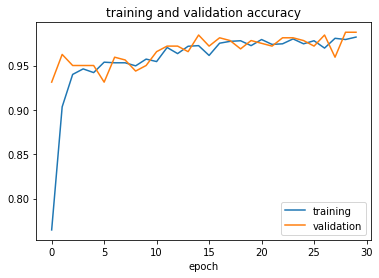

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('training and validation accuracy')
plt.xlabel('epoch')

In [17]:
test_loss, test_acc = model.evaluate(test_generator )
print('test acc: {} test loss: {}'.format(test_acc,test_loss))

16/16 [==============================] - 11s 713ms/step - loss: 0.0634 - accuracy: 0.9835
test acc: 0.9834710955619812 test loss: 0.06341509521007538


In [19]:
# test your model with some images from your local computer to predict whether a patient is affected by Covid19 or not
import numpy as np
from google.colab import files 
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  print(path)
  img = image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes == 0:
    print('Covid19')
  else:
    print('Normal')

Saving c.jpeg to c (1).jpeg
Saving n.jpeg to n (1).jpeg
/content/c.jpeg
c.jpeg
Covid19
/content/n.jpeg
n.jpeg
Normal


In [20]:
# saving the model
model.save('model.h5')

In [ ]:
from google.colab import files 
file.download('model.h5')